<b> Assignment 3 </b>

Name : Raf'ie Yusuf

Student ID : PYTN057ONL006

Bank Marketing Dataset

<b> Import Libraries </b>

In [1]:
#First thing to do is to import some libraries to execute the data
from sklearn import metrics
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import sklearn.linear_model as linear_model
import sklearn.neighbors as neighbors
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

log_model = linear_model.LogisticRegression()
knn_model = neighbors.KNeighborsClassifier(n_neighbors=3)
transformer = PolynomialFeatures()

<b> Data Loading and Exploration </b>

In [2]:
#Reading the data using Pandas
df = pd.read_csv('Desktop/dataset/Bank.csv', sep=';')
df.head() #.head function for the first five data of the dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:
df.tail() #.tail function for the first five data of the dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [4]:
df.info() #collecting the dataset info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [5]:
df.isna().sum() #checking for missing values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
df.describe() #collecting statistics info from the data

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [7]:
df.shape #checking the shape of the data

(4521, 17)

Because the 'y' column is related to 'deposit' so i will change the 'y' column name into 'deposit'

In [8]:
df.rename(columns={'y': 'deposit'}, inplace=True) #rename columns y to deposit
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [9]:
#turning the deposit column from string to int
depo_int = df['deposit']

le = preprocessing.LabelEncoder()
depo_enc = le.fit_transform(depo_int)
#from now, '0' in deposit will be 'no' and '1' will be 'yes'

In [10]:
df['deposit']=depo_enc
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0


Visualizing the Data

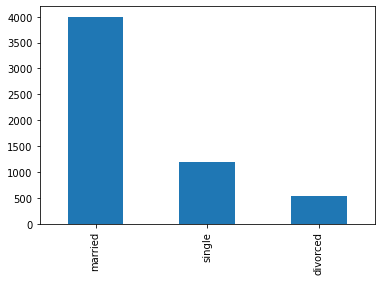

In [11]:
#using bar chart to visualize the deposit data by marital status
depo_plot = df['deposit'].value_counts().plot(kind='bar')
mar_plot = df['marital'].value_counts().plot(kind='bar')

Text(0, 0.5, 'Balance')

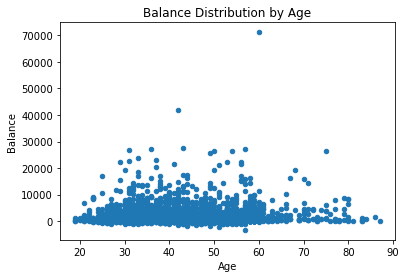

In [12]:
#another visualization using scatter to visualize the balance by age
age_scat_plot = df.plot(kind='scatter',x='age',y='balance')
plt.title('Balance Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Balance')

Text(0, 0.5, 'Frequency')

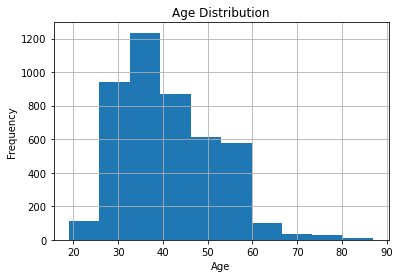

In [13]:
#the last thing to explore is the age distribution using histogram chart
df.age.hist()
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

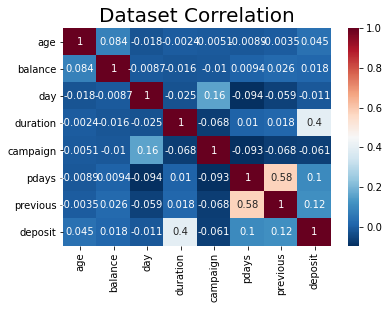

In [14]:
#let's see the correlation
cor_df = df.corr()
int_df = df.select_dtypes(exclude="object")
corr_int = int_df.corr()
sns.heatmap(corr_int, annot=True, cmap="RdBu_r")
plt.title("Dataset Correlation", fontsize=20)
plt.show()

<b> Data preprocessing </b>

Because there are still 'object' datatype, in this section i will turn those 'object' datatype into integer

In [15]:
#encoding the categorical features
data = pd.get_dummies(df, columns=["job","marital","education","default","housing","loan","contact","month","poutcome" ])
data.describe

<bound method NDFrame.describe of       age  balance  day  duration  campaign  pdays  previous  deposit  \
0      30     1787   19        79         1     -1         0        0   
1      33     4789   11       220         1    339         4        0   
2      35     1350   16       185         1    330         1        0   
3      30     1476    3       199         4     -1         0        0   
4      59        0    5       226         1     -1         0        0   
...   ...      ...  ...       ...       ...    ...       ...      ...   
4516   33     -333   30       329         5     -1         0        0   
4517   57    -3313    9       153         1     -1         0        0   
4518   57      295   19       151        11     -1         0        0   
4519   28     1137    6       129         4    211         3        0   
4520   44     1136    3       345         2    249         7        0   

      job_admin.  job_blue-collar  ...  month_jun  month_mar  month_may  \
0             

In [16]:
#value count the target (deposit)
df.deposit.value_counts()

0    4000
1     521
Name: deposit, dtype: int64

<b> Logistic Regression </b>

In [17]:
#assigning variables
x = data
y = data['deposit']

In [18]:
#Training and testing variables
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(3164, 52) (3164,)
(1357, 52) (1357,)


In [19]:
log_model.fit(x_train,y_train)

LogisticRegression()

In [20]:
#model prediction
log_pred = log_model.predict(x_test)

# model Evaluation
accuracy_log = accuracy_score(y_test, log_pred)
print("Accuracy:", accuracy_log)

Accuracy: 0.971997052321297


<b> K-Nearest Neighbors </b>

In [21]:
#model fitting
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

Accuracy: 0.868828297715549


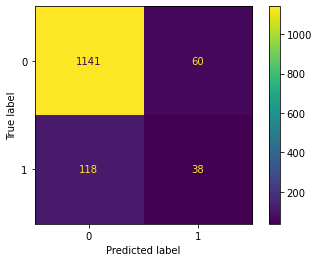

In [22]:
#model predict
knn_pred = knn_model.predict(x_test)
#model Evaluation
accuracy_knn = accuracy_score(y_test, knn_pred)
print("Accuracy:", accuracy_knn)

#visualizing the KNN model
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn_model, x_test, y_test)

<b> Random Forest </b>

In [23]:
#variable assignment
rf_model = RandomForestClassifier(n_estimators=100)
#Fitting the classifier
rf_model.fit(x_train, y_train)
rf_pred = rf_model.predict(x_test)

In [24]:
# model Evaluation
accuracy_rf = accuracy_score(y_test, rf_pred)
print("Accuracy:", accuracy_rf)

# Classification Report & Confusion matrix
print(classification_report(y_test, rf_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1201
           1       1.00      1.00      1.00       156

    accuracy                           1.00      1357
   macro avg       1.00      1.00      1.00      1357
weighted avg       1.00      1.00      1.00      1357



<AxesSubplot:>

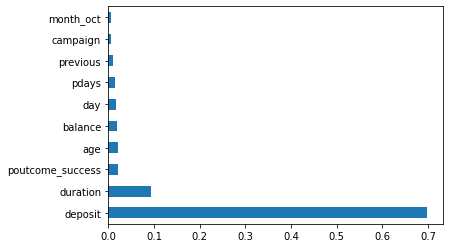

In [25]:
# Feature importance in randomforestRandomForest
rf_model.feature_importances_ 
# Plot of importances
feat_importances = pd.Series(rf_model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')

<b> Support Vector Machine </b>

In [26]:
#variable assignment
svm_model = svm.SVC()
#model fitting
svm_model.fit(x_train, y_train)

SVC()

In [27]:
#model prediction
svm_pred = svm_model.predict(x_test)

#model Evaluation
accuracy_svm = accuracy_score(y_test, svm_pred)
print("Accuracy:", accuracy_svm)

#Classification Report & Confusion matrix
print(confusion_matrix(svm_pred, y_test))
print(classification_report(svm_pred, y_test))

Accuracy: 0.8850405305821666
[[1201  156]
 [   0    0]]
              precision    recall  f1-score   support

           0       1.00      0.89      0.94      1357
           1       0.00      0.00      0.00         0

    accuracy                           0.89      1357
   macro avg       0.50      0.44      0.47      1357
weighted avg       1.00      0.89      0.94      1357



<b>Decision Tree </b>

In [28]:
#variable assignment
dc_model = DecisionTreeClassifier()
#model fitting
dc_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [29]:
#model predict for test dataset
dc_pred = dc_model.predict(x_test)

#model evaluation
accuracy_dc = accuracy_score(y_test, dc_pred)
print("Accuracy:", accuracy_dc)

#Classification Report & Confusion matrix
print(confusion_matrix(dc_pred, y_test))
print(classification_report(y_test, dc_pred))

Accuracy: 1.0
[[1201    0]
 [   0  156]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1201
           1       1.00      1.00      1.00       156

    accuracy                           1.00      1357
   macro avg       1.00      1.00      1.00      1357
weighted avg       1.00      1.00      1.00      1357



<b> Naive Bayes </b>

In [30]:
from sklearn.naive_bayes import GaussianNB

#variable assignment
nb_model = GaussianNB()
#model fitting
nb_model.fit(x_train,y_train)

GaussianNB()

In [31]:
#model predict
nb_pred = nb_model.predict(x_test)

#model evaluation
accuracy_NB = accuracy_score(y_test, nb_pred)
print("Accuracy:", accuracy_NB)

#Classification Report & Confusion matrix
print(confusion_matrix(nb_pred, y_test))
print(classification_report(y_test, nb_pred))

Accuracy: 1.0
[[1201    0]
 [   0  156]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1201
           1       1.00      1.00      1.00       156

    accuracy                           1.00      1357
   macro avg       1.00      1.00      1.00      1357
weighted avg       1.00      1.00      1.00      1357



<b> Insight </b>

In [32]:
print('Accuracy of Logistic Regression: ', accuracy_log)
print('Accuracy of K-Nearest Neighbors: ', accuracy_knn)
print('Accuracy of Random Forest: ', accuracy_rf)
print('Accuracy of Support Vector Machine: ', accuracy_svm)
print('Accuracy of Decision Tree: ', accuracy_dc)
print('Accuracy of Naive Bayes: ', accuracy_NB)

Accuracy of Logistic Regression:  0.971997052321297
Accuracy of K-Nearest Neighbors:  0.868828297715549
Accuracy of Random Forest:  1.0
Accuracy of Support Vector Machine:  0.8850405305821666
Accuracy of Decision Tree:  1.0
Accuracy of Naive Bayes:  1.0


Despite it's wrong or not, here is my insight;

Random Forest, Decision Tree, and Naive Bayes have the highest accuracy by predicting all data correctly. Beside that, K-Nearest Neighbors has the lowest accuracy point with 0.86.